<a href="https://colab.research.google.com/github/ItsRajSingh/ComputerVisionLearning/blob/main/MNIST_handwritten_digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Keras Sequential API example

In [36]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam , RMSprop
from tensorflow.keras.utils import to_categorical,plot_model

In [37]:
#Multi Layer Perceptron is a fully connected Neural Network
#This leads to overfitting in Data
#Feed Forward Neural Networks
#Logistic Regression is the simplest Neural Network
# MLP will be used in problems like Linear and Logistic Regression
# Most simplest type of neural network that can be applied to most of the problems
# There should be a sufficiently large dataset
# MNIST has sufficient information

In [38]:
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test,y_test)=mnist.load_data()

In [39]:
unique, counts = np.unique(y_test, return_counts= True)
print("Test has",dict(zip(unique,counts)))

Test has {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [40]:
unique, cournts = np.unique(y_train, return_counts=True)
print("Train has", dict(zip(unique,counts)))

Train has {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [41]:
indexes = np.random.randint(0,x_train.shape[0],size = 25)
images = x_train[indexes]
labels = y_train[indexes]

In [42]:
images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [43]:
labels

array([9, 8, 2, 2, 6, 1, 1, 7, 5, 1, 0, 5, 8, 4, 8, 3, 5, 1, 5, 3, 8, 6,
       9, 1, 2], dtype=uint8)

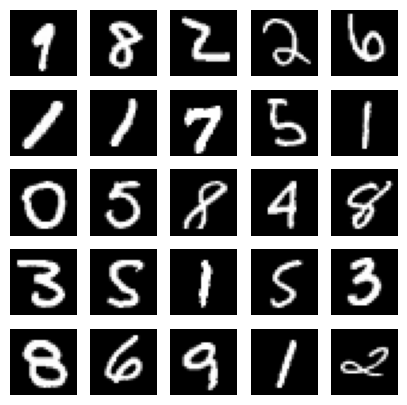

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
  plt.subplot(5,5,i+1)
  #i+1 is used because in plt.subplot(5,5,index): the index parameter defines the position of
  #the subplot and the parameter is one based i.e it starts from 1 NOT 0. So we need to write
  #i+1 for the code to make sense
  image = images[i]
  plt.imshow(image, cmap = 'gray')
  plt.axis('off')


In [45]:
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [46]:
#Let convert the labels to be one hot encoded

In [47]:
y_train= to_categorical(y_train)
y_test = to_categorical(y_test)

In [48]:
#Lets Normalize the input data so that the pixel values range from 0-1
#The input is a 1D tensor
#We will have to reshape our x_train and x_test

In [49]:
x_train.shape

(60000, 28, 28)

In [50]:
x_train[1:].max()

255

In [51]:
image_size = x_train.shape[1]
input_size = image_size*image_size
x_train = np.reshape(x_train,[-1,input_size])
x_train= x_train.astype('float32')/255
x_test = np.reshape(x_test,[-1,input_size])
x_test = x_test.astype('float32')/255

In [52]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [53]:
# We will be using a Sequential Model for this problem i.e MLP

In [76]:
model = Sequential()
model.add(Dense(hidden_units, input_dim = input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(len(np.unique(labels))))
model.add(Activation('softmax'))
#Softmax deals with multi class classification

In [77]:
 model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 256)               200960    
                                                                 
 activation_20 (Activation)  (None, 256)               0         
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 256)               65792     
                                                                 
 activation_21 (Activation)  (None, 256)               0         
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 10)               

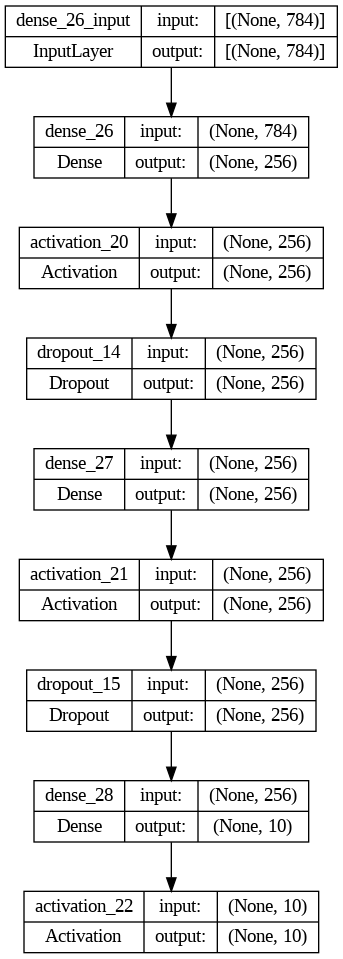

In [78]:
plot_model(model, to_file = 'mlp.mnist.png', show_shapes = True)

In [79]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [80]:
model.fit(x_train,y_train, epochs = 20, batch_size = batch_size)

Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 0.4190 - accuracy: 0.8716
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1945 - accuracy: 0.9424
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1506 - accuracy: 0.9546
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1294 - accuracy: 0.9611
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1137 - accuracy: 0.9655
Epoch 6/20
469/469 [==============================] - 4s 10ms/step - loss: 0.1021 - accuracy: 0.9687
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0948 - accuracy: 0.9707
Epoch 8/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0848 - accuracy: 0.9739
Epoch 9/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0829 - accuracy: 0.9738
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0748 - accuracy

In [81]:
loss, acc= model.evaluate(x_test,y_test, batch_size = batch_size)


79/79 [==============================] - 1s 6ms/step - loss: 0.0594 - accuracy: 0.9832


In [82]:
from tensorflow.keras.regularizers import l2
model.add(Dense(hidden_units, kernel_regularizer = l2(0.001),input_dim = input_size))
model.add(Dense(len(np.unique(labels))))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 256)               200960    
                                                                 
 activation_20 (Activation)  (None, 256)               0         
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 256)               65792     
                                                                 
 activation_21 (Activation)  (None, 256)               0         
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 10)               

In [83]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [84]:
model.fit(x_train,y_train, epochs =20, batch_size= batch_size)

Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 0.3639 - accuracy: 0.9658
Epoch 2/20
469/469 [==============================] - 8s 18ms/step - loss: 0.1456 - accuracy: 0.9785
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1230 - accuracy: 0.9797
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1112 - accuracy: 0.9802
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1026 - accuracy: 0.9808
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0982 - accuracy: 0.9808
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0954 - accuracy: 0.9805
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0887 - accuracy: 0.9820
Epoch 9/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0852 - accuracy: 0.9818
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0877 - accurac

In [85]:
loss, acc = model.evaluate(x_test, y_test, batch_size = batch_size )

79/79 [==============================] - 1s 6ms/step - loss: 0.0809 - accuracy: 0.9838
